In [1]:
#Dependencies 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from scipy.stats import linregress


In [2]:
file= Path("Resources/heart_2020_cleaned.csv")
df = pd.read_csv(file)
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [3]:
yes_pys = df.loc[df["PhysicalActivity"]=="Yes"]
no_pys = df.loc[df["PhysicalActivity"]=="No"]

# Separate the data for individuals with heart disease and without heart disease
yes_heart_dis= df[df['HeartDisease'] == 'Yes']
no_heart_dis = df[df['HeartDisease'] == 'No']

yes_heart_dis

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
10,Yes,34.30,Yes,No,No,30.0,0.0,Yes,Male,60-64,White,Yes,No,Poor,15.0,Yes,No,No
35,Yes,32.98,Yes,No,Yes,10.0,0.0,Yes,Male,75-79,White,Yes,Yes,Poor,4.0,No,No,Yes
42,Yes,25.06,No,No,No,0.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,7.0,No,No,Yes
43,Yes,30.23,Yes,No,No,6.0,2.0,Yes,Female,75-79,White,Yes,Yes,Fair,8.0,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319765,Yes,38.45,No,No,Yes,30.0,15.0,Yes,Female,55-59,Hispanic,Yes,Yes,Poor,6.0,Yes,No,No
319767,Yes,36.21,Yes,No,No,0.0,0.0,Yes,Female,75-79,Hispanic,Yes,Yes,Good,8.0,No,No,No
319781,Yes,37.12,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,7.0,No,No,No
319786,Yes,33.20,Yes,No,No,0.0,0.0,No,Female,60-64,Hispanic,Yes,Yes,Very good,8.0,Yes,No,No


In [4]:
df['MentalHealth']

0         30.0
1          0.0
2         30.0
3          0.0
4          0.0
          ... 
319790     0.0
319791     0.0
319792     0.0
319793     0.0
319794     0.0
Name: MentalHealth, Length: 319795, dtype: float64

yes_pys.groupby("Race").aggregate({"HeartDisease":"count"})
#({"HeartDisease":"count"})

# Mental and Physical Health

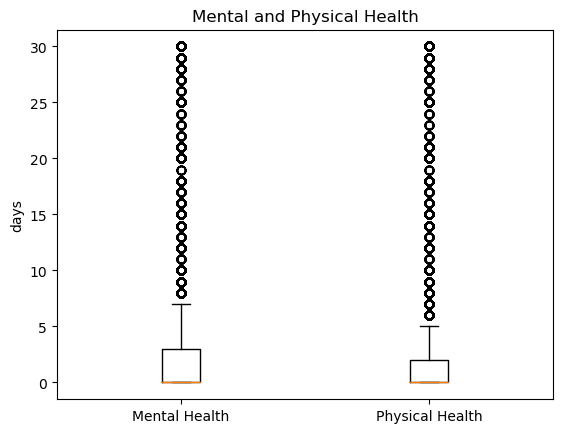

In [5]:
# Create a figure and axes
fig, ax = plt.subplots()

# Create the side-by-side box plots
box_plot = ax.boxplot([df['MentalHealth'], df['PhysicalHealth']], labels=['Mental Health', 'Physical Health'])

# Add labels and title
#df.boxplot(column='MentalHealth')
plt.title('Mental and Physical Health')
plt.ylabel('days')
plt.show()

# Mental Health

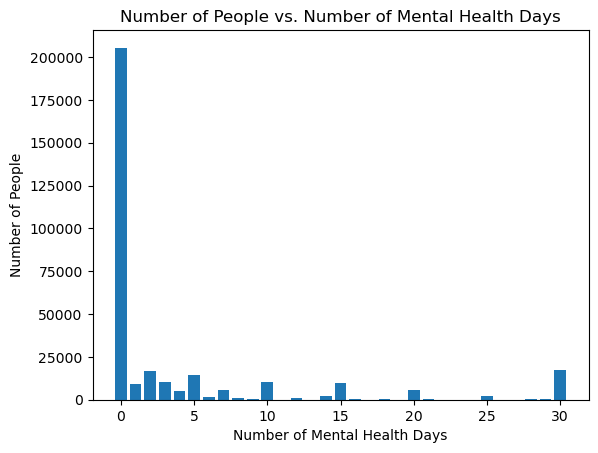

In [6]:
#Frequency of mental health days
freq=df['MentalHealth'].value_counts().sort_index()
plt.bar(freq.index, freq.values)
plt.xlabel('Number of Mental Health Days')
plt.ylabel('Number of People')
plt.title('Number of People vs. Number of Mental Health Days')
plt.show()

R squared: 0.3292861895340283


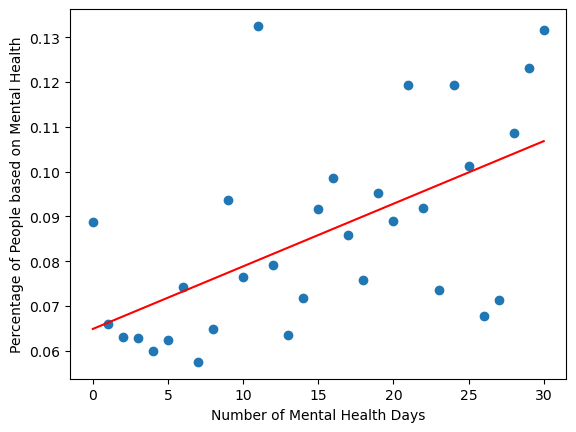

In [7]:
#Mental Health vs Heart disease
mental_vs_hd=[]
mental_days=[]
for i in range(31):
	mental_days.append(i)
	total = len(df.loc[df["MentalHealth"]==i])
	sick = len(df.loc[(df["MentalHealth"]==i)&(df["HeartDisease"]=="Yes")])
	mental_vs_hd.append(sick/total)
    
# Convert the lists to NumPy arrays
x = np.array(mental_days)
y = np.array(mental_vs_hd)

# Run linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(mental_days,mental_vs_hd)

# Plot regression line
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Number of Mental Health Days')
plt.ylabel('Percentage of People based on Mental Health')

# Print r square value
print(f"R squared: {r_value**2}")

# Show plot
plt.show()



# Physical Health

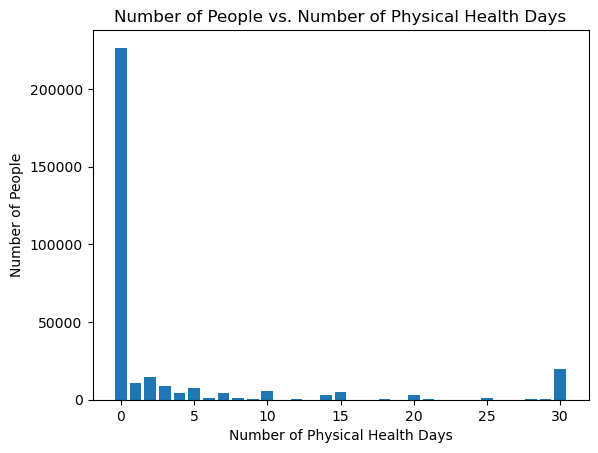

In [8]:
#Frequency of Physical health days
freq=df['PhysicalHealth'].value_counts().sort_index()
plt.bar(freq.index, freq.values)
plt.xlabel('Number of Physical Health Days')
plt.ylabel('Number of People')
plt.title('Number of People vs. Number of Physical Health Days')
plt.show()

R squared: 0.7353421389003855


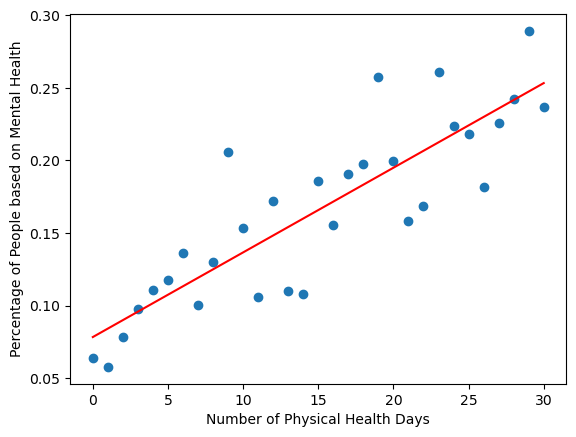

In [9]:
#Mental Health vs Heart disease
physical_vs_hd=[]
physical_days=[]
for i in range(31):
	physical_days.append(i)
	total_phy = len(df.loc[df["PhysicalHealth"]==i])
	sick_phy = len(df.loc[(df["PhysicalHealth"]==i)&(df["HeartDisease"]=="Yes")])
	physical_vs_hd.append(sick_phy/total_phy)
    
# Convert the lists to NumPy arrays
a = np.array(physical_days)
b = np.array(physical_vs_hd)

# Run linear regression
slope, intercept, r_value, p_value, std_err = linregress(a, b)
regress_values = a * slope + intercept
line_eq = "b = " + str(round(slope,2)) + "a + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(physical_days,physical_vs_hd)

# Plot regression line
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Number of Physical Health Days')
plt.ylabel('Percentage of People based on Mental Health')

# Print r square value
print(f"R squared: {r_value**2}")

# Show plot
plt.show()


# General Health

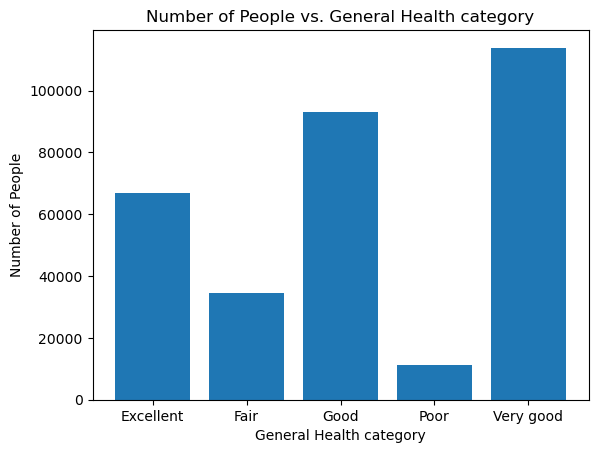

In [10]:
#General Health
Gen_health=df['GenHealth'].value_counts().sort_index()
plt.bar(Gen_health.index, Gen_health.values)
plt.xlabel('General Health category')
plt.ylabel('Number of People')
plt.title('Number of People vs. General Health category')
plt.show()


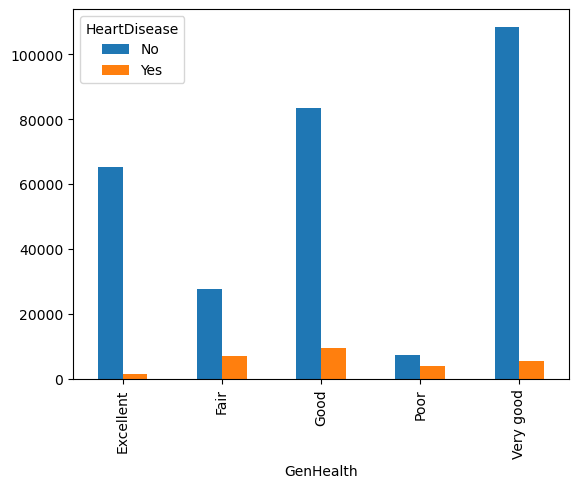

HeartDisease,No,Yes
GenHealth,,
Excellent,65342,1500
Fair,27593,7084
Good,83571,9558
Poor,7439,3850
Very good,108477,5381


In [11]:
#df.groupby(["HeartDisease","GenHealth"]).count()

grouped_data =df.groupby('GenHealth')['HeartDisease'].value_counts()

# Unstack the data to create a DataFrame with "Yes" and "No" as columns and categories as the index
grouped_data = grouped_data.unstack(fill_value=0)
grouped_data.plot(kind='bar')
plt.show()
grouped_data